In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r"C:\Users\Harshan\Documents\dfa"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\Harshan\Documents\dfa\bankloans.csv
C:\Users\Harshan\Documents\dfa\Consumer Credit Risk Management.ipynb
C:\Users\Harshan\Documents\dfa\credit-risk-analysis-using-light-gbm.ipynb
C:\Users\Harshan\Documents\dfa\DEVOPS FOR AI.docx
C:\Users\Harshan\Documents\dfa\DevOps Lab Syllabus.pdf
C:\Users\Harshan\Documents\dfa\DFA LAB 2.docx
C:\Users\Harshan\Documents\dfa\DFA_LAB ACTIVITY 3.docx
C:\Users\Harshan\Documents\dfa\DFA_lab4.docx
C:\Users\Harshan\Documents\dfa\dfa_lab5.docx
C:\Users\Harshan\Documents\dfa\dfa_lb1.docx
C:\Users\Harshan\Documents\dfa\logestic_regression.ipynb
C:\Users\Harshan\Documents\dfa\.ipynb_checkpoints\Consumer Credit Risk Management-checkpoint.ipynb
C:\Users\Harshan\Documents\dfa\.ipynb_checkpoints\credit-risk-analysis-using-light-gbm-checkpoint.ipynb
C:\Users\Harshan\Documents\dfa\.ipynb_checkpoints\logestic_regression-checkpoint.ipynb


In [14]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
os.chdir(r"C:\Users\Harshan\Documents\dfa\bankloans.csv")

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\Harshan\\Documents\\dfa\\bankloans.csv'

In [4]:
raw_df = pd.read_csv('input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv')
raw_df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


we cannot use rows where default value is null. we can use it to predict but we wont have base if the predicted value is true or false. hence drop those rows

In [6]:
raw_df.dropna(inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [7]:
# drop address column, as it wont be of much signifance, it has integer values instead of strings.
# It can represent locations, but this type of data should be one hot encoded instead 

In [8]:
raw_df.drop(columns=['address'], inplace=True)

In [9]:
# Find correlations with the target and sort
corr_matrix = raw_df.corr()

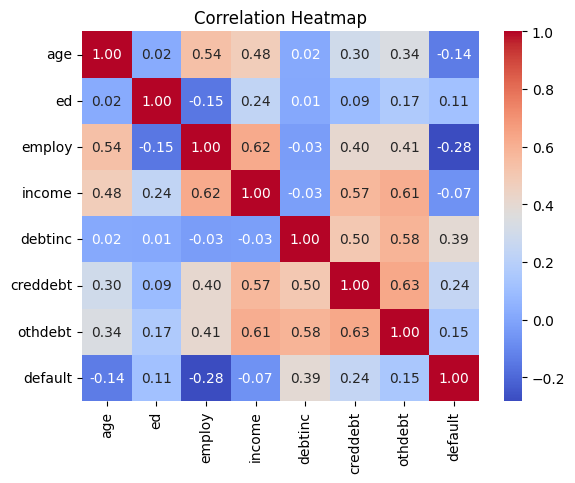

In [10]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [13]:
# raw_df.columns
X = raw_df.drop(['default'],axis=1)
y = raw_df['default']

In [14]:
# X.head()
# y.head()

In [15]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

In [16]:
# There are no missing values present, after we used dropna function

# Scale each feature to 0-1
scaler = MinMaxScaler()

X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.fit_transform(X_test)

In [17]:
# X_train_tf
# y_train
# y_test

In [18]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.4, random_state = 24)

# Train on the training data
log_reg.fit(X_train_tf, y_train)

LogisticRegression(C=0.4, random_state=24)

In [19]:
log_reg.score(X_test_tf,y_test)

0.8214285714285714

In [20]:
# Make predictions
log_reg_preds = log_reg.predict(X_test_tf)

In [21]:
# y_test
# log_reg_preds

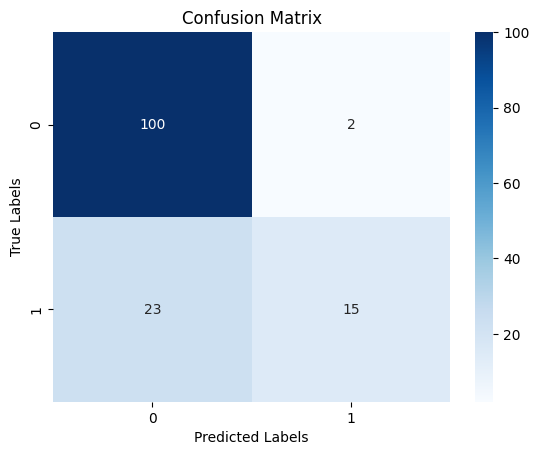

In [22]:
cm = confusion_matrix(y_test, log_reg_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#modeling
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# Splitting data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
n_folds = 5
max_evals = 5

In [24]:
# Create a training and testing dataset
train_set = lgb.Dataset(data = X_train_tf, label = y_train)
test_set = lgb.Dataset(data = X_test_tf, label = y_test)

In [25]:
# train_set
# test_set

In [26]:
# Get default hyperparameters
model = lgb.LGBMClassifier()
default_params = model.get_params()

In [27]:
# default_params

In [28]:
# Remove the number of estimators because we will set this to 50 in the cv call
# del default_params['n_estimators']

# Cross validation with early stopping
cv_results = lgb.cv(default_params, train_set, num_boost_round = 100, callbacks=[lgb.early_stopping(stopping_rounds=20)],
                    metrics = 'auc', nfold = n_folds, seed = 42)

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 7
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 7
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:685: UserWarning: Found 'n_estimators' in params. Will use it instead of 'num_boost_round' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'num_boost_round' argument")


In [29]:
# Print the keys available in cv_results
print("Keys in cv_results:", cv_results.keys())

Keys in cv_results: dict_keys(['valid auc-mean', 'valid auc-stdv'])


In [30]:
print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'\
      .format(cv_results['valid auc-mean'][-1], cv_results['valid auc-stdv'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['valid auc-mean'])))

The maximum validation ROC AUC was: 0.78729 with a standard deviation of 0.02843.
The optimal number of boosting rounds (estimators) was 68.


In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
# Hyperparameter grid for randomsearch
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'colsample_bytree': list(np.linspace(0.6, 1, 10)), 
    'learning_rate': list(np.logspace(np.log10(0.1), np.log10(0.5), base = 10, num = 20)),  # greater learning rate, to learn more from less data
    'max_depth': list(range(3, 10)),  # less features, hence less depth
    'min_child_samples': list(range(10, 100, 5)),  # small data, hence less samples
    'n_estimators': list(range(20, 80)),  # we got the optimal number - 68
    'num_leaves': list(range(5, 50)),  # small data, hence less leaves
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

In [33]:
# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=10, scoring='roc_auc', cv=5, verbose=1, random_state=24)

# Perform RandomizedSearchCV on the dataset
random_search.fit(X_train_tf, y_train)

# Get the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 116, number of negative: 332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 7
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258929 -> initscore=-1.051545
[LightGBM] [Info] Start training from score -1.05154

Best parameters: {'subsample': 0.8787878787878789, 'reg_lambda': 0.3469387755102041, 'reg_alpha': 0.9591836734693877, 'num_leaves': 35, 'n_estimators': 30, 'min_child_samples': 30, 'max_depth': 3, 'learning_rate': 0.16623687636846785, 'is_unbalance': True, 'colsample_bytree': 0.6444444444444444, 'boosting_type': 'gbdt'}

Best score: 0.8086414624013294

In [34]:
import pprint
pprint.pprint(random_search.best_params_)

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6444444444444444,
 'is_unbalance': True,
 'learning_rate': 0.16623687636846785,
 'max_depth': 3,
 'min_child_samples': 30,
 'n_estimators': 30,
 'num_leaves': 35,
 'reg_alpha': 0.9591836734693877,
 'reg_lambda': 0.3469387755102041,
 'subsample': 0.8787878787878789}


In [35]:
best_lgb_model = lgb.LGBMClassifier(**random_search.best_params_)
best_lgb_model.fit(X_train_tf, y_train)
preds = best_lgb_model.predict_proba(X_test_tf)[:, 1]
print('The best model from random search scores {:.5f} ROC AUC on the test set.'\
      .format(roc_auc_score(y_test, preds)))

[LightGBM] [Info] Number of positive: 145, number of negative: 415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258929 -> initscore=-1.051545
[LightGBM] [Info] Start training from score -1.051545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

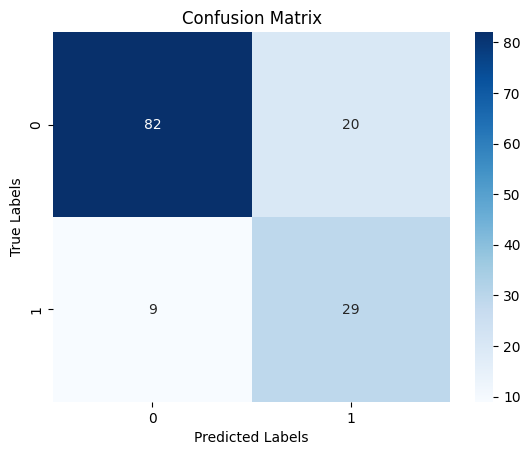

In [36]:
y_preds = best_lgb_model.predict(X_test_tf)
# y_preds
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix

|                   | Predicted Negative | Predicted Positive |
|-------------------|---------------------|---------------------|
| **Actual Negative** | TN                  | FP                  |
| **Actual Positive** | FN                  | TP                  |

In [37]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Type I Error (False Positive Rate)
type_I_error = FP / (FP + TN)

# Calculate Type II Error (False Negative Rate)
type_II_error = FN / (TP + FN)

# Display the results
print(f"Confusion Matrix:\n{cm}")
print(f"Type I Error (False Positive Rate): {type_I_error:.2f}")
print(f"Type II Error (False Negative Rate): {type_II_error:.2f}")

Confusion Matrix:
[[82 20]
 [ 9 29]]
Type I Error (False Positive Rate): 0.20
Type II Error (False Negative Rate): 0.24


## Summary
Performed baseline prediction using Logistic Regression and LightGBM model.

Finally we used hyperparameter optimization to get better **score** of **0.86713 ROC AUC** on the test set.
i.e. **86.713% accuracy** on our test dataset

Since we used roc_auc score, we also got low **Type I and Type II error, 0.2 and 0.24 respectively**  